In [14]:
!unzip '/content/sms_spam_collection_dataset.zip'

Archive:  /content/archive (2).zip
  inflating: spam.csv                


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
data=pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')

In [32]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
data.shape

(5572, 5)

In [34]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [35]:
data=data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [36]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
data=data.rename(columns={'v1':'label','v2':'text'})

In [38]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [41]:
ham=data[data['label']=='ham']

In [42]:
ham.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [45]:
spam=data[data['label']=='spam']

In [46]:
spam.head()

,label,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [47]:
ham.shape,spam.shape

((4825, 2), (747, 2))

In [48]:
ham=ham.sample(spam.shape[0])

In [49]:
ham.shape

(747, 2)

In [50]:
df=ham.append(spam,ignore_index=True)
df=df.reset_index()
df.head()

,index,label,text
0,0,ham,Busy here. Trying to finish for new year. I am...
1,1,ham,Mark works tomorrow. He gets out at 5. His wor...
2,2,ham,Aiyo a bit pai seh Ì_ noe... Scared he dun rem...
3,3,ham,ÌÏ mean it's confirmed... I tot they juz say o...
4,4,ham,We have all rounder:)so not required:)


In [51]:
df=df.drop(columns=['index'])

In [60]:
a=[]
for i in range(0,len(df)):
  a.append(len(df['text'][i]))

In [61]:
df['length']=a

In [70]:
import string
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
b=[]
for i in range(0,len(df)):
  b.append(count(df['text'][i],set(string.punctuation)))

In [71]:
df['punctutaion']=b

In [72]:
df.tail()

,label,text,length,punctutaion
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,161,8


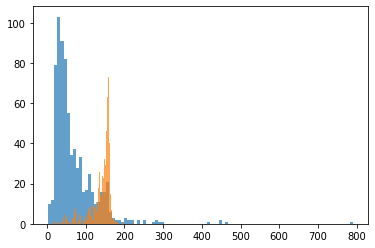

In [67]:
plt.hist(df[df['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(df[df['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

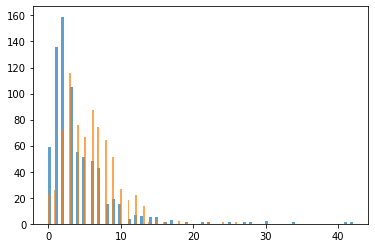

In [73]:
plt.hist(df[df['label']=='ham']['punctutaion'],bins=100,alpha=0.7)
plt.hist(df[df['label']=='spam']['punctutaion'],bins=100,alpha=0.7)
plt.show()

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['label'],test_size=0.2,random_state=0,shuffle=True,stratify=df['label'])

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [99]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [100]:
y_pred=clf.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[150,   0],
       [ 17, 132]])

In [102]:
accuracy_score(y_test,y_pred)

0.9431438127090301

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=1000,gamma='auto'))])

In [105]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_fun

In [106]:
y_pred=clf.predict(x_test)

In [108]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[147,   3],
       [ 13, 136]])

In [107]:
accuracy_score(y_test,y_pred)

0.9464882943143813